<a href="https://colab.research.google.com/github/cweidig/measuring_bias/blob/main/measure_bias_model_2logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# read the file mortgage_data_project.pkl from Google drive with pandas' read_pickle()
import pandas as pd
import seaborn as sns
import numpy as np

pickle_df = pd.read_pickle('drive/My Drive/mortgage_data_project.pkl')

pickle_df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2011,0000009179,Office of the Comptroller of the Currency,OCC,1,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1653,5972.0,1.890000,66600.0,106.129997,1973.0,2194.0,0
1,2011,0000476810,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,31273,4188.0,4.660000,49500.0,106.169998,1331.0,3113.0,0
2,2011,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1164651,9565.0,42.529999,61200.0,100.330002,2504.0,3149.0,0
3,2011,0000030052,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,...,NaN,NaN,515,5928.0,9.990000,67400.0,170.520004,1755.0,2102.0,0
4,2011,0002888798,Federal Reserve System,FRS,2,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,44491,4021.0,3.560000,54200.0,139.789993,1296.0,1487.0,0


In [ ]:
# Do a quick inspection to get familiar with the dataset by
# (i) analyzing the number of rows and columns;
pickle_df.shape

# (ii) visualizing the first few lines of the dataset; and
pickle_df.head()

# (iii) listing the names of each variable and type.
pickle_df.columns
pickle_df.dtypes

as_of_year                          int64
respondent_id                      object
agency_name                        object
agency_abbr                        object
agency_code                         int64
                                   ...   
hud_median_family_income          float64
tract_to_msamd_income             float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
application_date_indicator          int64
Length: 78, dtype: object

<Axes: xlabel='log(applicant_income_000s)', ylabel='Count'>

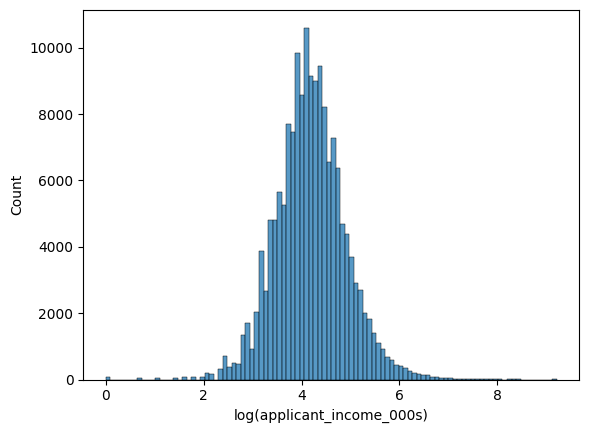

In [4]:
# Apply a log transformation to the raw applicant_income_000s values and add them as a new column to the dataframe named log(applicant_income_000s).
pickle_df['log(applicant_income_000s)'] = np.log(pickle_df['applicant_income_000s'])

# Plot another histogram for log(applicant_income_000s)
sns.histplot(data=pickle_df, x='log(applicant_income_000s)', bins=100)

In [5]:
keep_vars = ['agency_abbr', 'loan_type_name', 'loan_amount_000s', 'log(applicant_income_000s)', 'owner_occupancy_name', 'loan_purpose_name', 'property_type_name', 'applicant_ethnicity_name', 'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s', 'population', 'minority_population', 'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units', 'action_taken_name']

pickle_df_filtered = pickle_df[keep_vars]

pickle_df_filtered.columns

Index(['agency_abbr', 'loan_type_name', 'loan_amount_000s',
       'log(applicant_income_000s)', 'owner_occupancy_name',
       'loan_purpose_name', 'property_type_name', 'applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s',
       'population', 'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'action_taken_name'],
      dtype='object')

In [6]:
# one hot encode categorical vars
from sklearn.preprocessing import OneHotEncoder

cat_variables = ['applicant_ethnicity_name', 'applicant_race_name_1', 'applicant_sex_name', 'agency_abbr', 'owner_occupancy_name', 'property_type_name', 'loan_purpose_name', 'loan_type_name']

oh= OneHotEncoder(sparse_output=False).set_output(transform="pandas")

#enc.fit(pickle_df_filtered[cat_variables])

one_hot_encoded=oh.fit_transform(pickle_df_filtered[cat_variables])

#Create a Pandas DataFrame of the hot encoded column
#ohe_df = pd.DataFrame(transformed)

#concat with original data
hmda_ohe_df = pd.concat([pickle_df_filtered, one_hot_encoded], axis=1).drop(cat_variables, axis=1)

hmda_ohe_df



,loan_amount_000s,log(applicant_income_000s),applicant_income_000s,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,action_taken_name,...,owner_occupancy_name_Owner-occupied as a principal dwelling,property_type_name_Manufactured housing,property_type_name_One-to-four family dwelling (other than manufactured housing),loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,loan_type_name_Conventional,loan_type_name_FHA-insured,loan_type_name_FSA/RHS-guaranteed,loan_type_name_VA-guaranteed
0,102,5.017280,151.0,5972.0,1.890000,66600.0,106.129997,1973.0,2194.0,Loan originated,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,114,3.401197,30.0,4188.0,4.660000,49500.0,106.169998,1331.0,3113.0,Loan originated,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,105,4.718499,112.0,9565.0,42.529999,61200.0,100.330002,2504.0,3149.0,Loan originated,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,270,5.204007,182.0,5928.0,9.990000,67400.0,170.520004,1755.0,2102.0,Loan originated,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,62,3.583519,36.0,4021.0,3.560000,54200.0,139.789993,1296.0,1487.0,Loan originated,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165945,116,4.276666,72.0,6282.0,15.120000,66600.0,121.879997,1968.0,2283.0,Application denied by financial institution,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
165946,85,3.367296,29.0,2930.0,2.830000,62800.0,130.320007,904.0,1021.0,Application denied by financial institution,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
165947,5,4.094345,60.0,4301.0,47.220001,84500.0,52.560001,446.0,1211.0,Application denied by financial institution,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
165948,95,3.912023,50.0,6101.0,7.330000,52700.0,93.489998,1633.0,2554.0,Application denied by financial institution,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [7]:
# Set all values in the action_taken_name column that equal Application denied by financial institution to True and all other values to false.
hmda_ohe_df['action_taken_name'] = hmda_ohe_df['action_taken_name'] == 'Application denied by financial institution'

hmda_ohe_df

,loan_amount_000s,log(applicant_income_000s),applicant_income_000s,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,action_taken_name,...,owner_occupancy_name_Owner-occupied as a principal dwelling,property_type_name_Manufactured housing,property_type_name_One-to-four family dwelling (other than manufactured housing),loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,loan_type_name_Conventional,loan_type_name_FHA-insured,loan_type_name_FSA/RHS-guaranteed,loan_type_name_VA-guaranteed
0,102,5.017280,151.0,5972.0,1.890000,66600.0,106.129997,1973.0,2194.0,False,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,114,3.401197,30.0,4188.0,4.660000,49500.0,106.169998,1331.0,3113.0,False,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,105,4.718499,112.0,9565.0,42.529999,61200.0,100.330002,2504.0,3149.0,False,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,270,5.204007,182.0,5928.0,9.990000,67400.0,170.520004,1755.0,2102.0,False,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,62,3.583519,36.0,4021.0,3.560000,54200.0,139.789993,1296.0,1487.0,False,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165945,116,4.276666,72.0,6282.0,15.120000,66600.0,121.879997,1968.0,2283.0,True,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
165946,85,3.367296,29.0,2930.0,2.830000,62800.0,130.320007,904.0,1021.0,True,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
165947,5,4.094345,60.0,4301.0,47.220001,84500.0,52.560001,446.0,1211.0,True,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
165948,95,3.912023,50.0,6101.0,7.330000,52700.0,93.489998,1633.0,2554.0,True,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [12]:
#  Create a pandas series object containing action_taken_name for each data point.
y = hmda_ohe_df['action_taken_name']

type(y)

pandas.core.series.Series

In [22]:
# For the input variables, create a dataframe containing all other columns apart from those related to race, ethnicity, sex, and minority population.
x_vars = [
 'loan_amount_000s', 'applicant_income_000s', 'population', 'hud_median_family_income', 'tract_to_msamd_income',
 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units', 'agency_abbr_CFPB', 'agency_abbr_FDIC',
    'agency_abbr_FRS', 'agency_abbr_HUD', 'agency_abbr_NCUA',
    'agency_abbr_OCC', 'owner_occupancy_name_Not applicable',
    'owner_occupancy_name_Not owner-occupied as a principal dwelling',
    'owner_occupancy_name_Owner-occupied as a principal dwelling',
    'property_type_name_Manufactured housing',
    'property_type_name_One-to-four family dwelling (other than manufactured housing)',
    'loan_purpose_name_Home improvement', 'loan_purpose_name_Home purchase',
    'loan_purpose_name_Refinancing', 'loan_type_name_Conventional',
    'loan_type_name_FHA-insured', 'loan_type_name_FSA/RHS-guaranteed',
    'loan_type_name_VA-guaranteed'
]

X = hmda_ohe_df[x_vars]

X.head()

,loan_amount_000s,applicant_income_000s,population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,agency_abbr_CFPB,agency_abbr_FDIC,agency_abbr_FRS,...,owner_occupancy_name_Owner-occupied as a principal dwelling,property_type_name_Manufactured housing,property_type_name_One-to-four family dwelling (other than manufactured housing),loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,loan_type_name_Conventional,loan_type_name_FHA-insured,loan_type_name_FSA/RHS-guaranteed,loan_type_name_VA-guaranteed
0,102,151.0,5972.0,66600.0,106.129997,1973.0,2194.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,114,30.0,4188.0,49500.0,106.169998,1331.0,3113.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,105,112.0,9565.0,61200.0,100.330002,2504.0,3149.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,270,182.0,5928.0,67400.0,170.520004,1755.0,2102.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,62,36.0,4021.0,54200.0,139.789993,1296.0,1487.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [25]:
# Configuration

# Instantiate a LogisticRegression classifier, configured to use the lbfgs solver without regularization, from the sklearn.linear_model module.
# Be sure to set the random state to get reproducible results.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)

"""
Instantiate a StratifiedKFold cross-validation scheme,
configured to use 10 folds and to shuffle the data before splitting into batches,
from the sklearn.model_selection module.
Be sure to set the random state to get reproducible results.
"""
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

"""
Import the following metrics from the scikit-learn metrics module:
accuracy_score, precision_score, recall_score, roc_auc_score, and f1_score.
"""
# setup the metrics to be computed
from sklearn import metrics
perf_metrics = {"Accuracy": metrics.accuracy_score,
                "Precision": metrics.precision_score,
                "Recall": metrics.recall_score,
                "AUC": metrics.roc_auc_score,
                "F1-Score": metrics.f1_score,
                }



In [ ]:
# Modeling

# Split the input and output variables using the cross-validator skf
import pandas as pd
k, i = True, 1

for (train, test) in skf.split(X, y):
    # fit model
    lr = log_reg.fit(X.iloc[train], y.iloc[train].values.ravel())

    # get predictions in the test set
    ypred_prob = lr.predict_proba(X.iloc[test]).ravel()[1::2] # get probabilities
    ypred_class = lr.predict(X.iloc[test])

    # compute performance metrics
    metrics = []
    for pf in perf_metrics.keys():
        if pf in ["AUC", "Brier"]:
            metrics += [[pf, perf_metrics[pf](y.iloc[test].values.ravel(), ypred_prob)]]
        else:
            metrics += [[pf, perf_metrics[pf](y.iloc[test].values.ravel(), ypred_class)]]

    # concatenate results
    df_m = pd.DataFrame(metrics, columns=["Metric", "Value"])
    df_m["Fold"] = i
    i += 1
    if k:
        df_metrics = df_m.copy()
        k=0
    else:
        df_metrics = pd.concat([df_metrics, df_m.copy()], axis=0, ignore_index=True)



In [28]:
# Compute the mean and standard deviation for each performance metric and print them out in a table.
df_metrics.pivot_table(index="Metric", values="Value", aggfunc=["mean", "std"])


,mean,std
,Value,Value
Metric,,
AUC,0.782774,0.003097
Accuracy,0.687912,0.003756
F1-Score,0.628307,0.005232
Precision,0.640679,0.005040
Recall,0.616464,0.008442


<Axes: title={'center': 'Value'}, xlabel='Metric'>

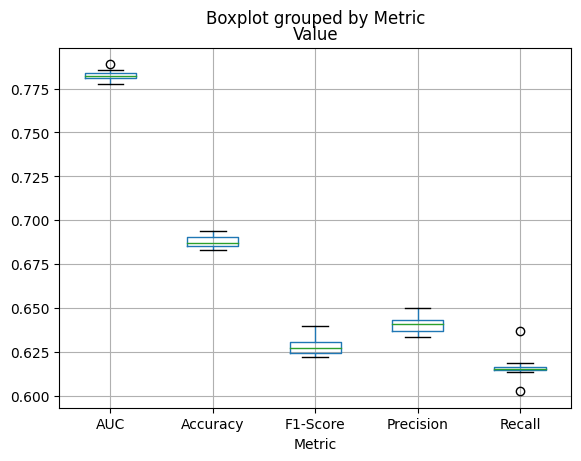

In [29]:
# Display the metrics in a box plot
df_metrics.boxplot(column='Value', by='Metric')